In [1]:
import numpy as np
import random as r
from matplotlib import pyplot as plt

#### Observation
* The t-score is computed from each sample, randomly drawn from population (doesn't matter what the population distribution is).
* Mean of normal distribution is known, but standard deviaiton is __not__ known.
* Estimate standard deviation from sample, adjusting for bias, and calculate standard error accordingly.
* As sample size increases, t-distribution approaches unit normal.

In [2]:
def plot_t_dist(population, sample_size, ax, n_samples=10000):
    t_scores = []

    for _ in range(n_samples):
        sample = [r.choice(population) for _ in range(sample_size)]

        sample_mean = np.mean(sample)
        sample_std = np.sqrt(sum((x - sample_mean) ** 2 for x in sample) / (sample_size - 1))
        est_se = sample_std / np.sqrt(sample_size)

        t_score = (sample_mean - mean) / est_se
        t_scores.append(t_score)

    unit_normal = np.random.normal(0, 1, n_samples)
    ax.hist(t_scores, bins=100, alpha=0.5, density=True)
    ax.hist(unit_normal, bins=100, alpha=0.5, density=True)
    ax.legend(["t-dist DOF=%i"%(sample_size-1), "unit normal"])
    ax.set_xlim([-5, 5])

##### Use normal population

In [3]:
mean = 2
std = 5
normal = np.random.normal(mean, std, 1000000)

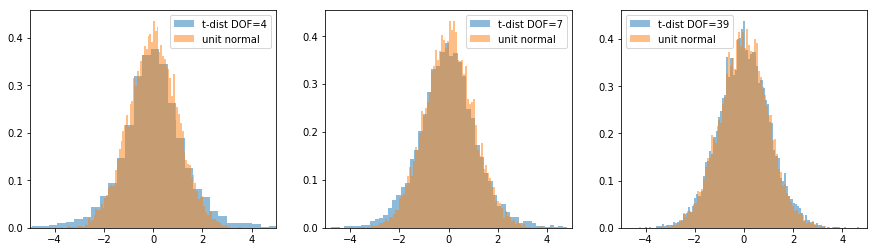

In [4]:
plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
plot_t_dist(population=normal, sample_size=5, ax=ax1)

ax2 = plt.subplot(1, 3, 2)
plot_t_dist(population=normal, sample_size=8, ax=ax2)

ax3 = plt.subplot(1, 3, 3)
plot_t_dist(population=normal, sample_size=40, ax=ax3)

##### Use Exponential population

In [5]:
# the exponential has mean 1 / lamb, std 1 / lamb
uni = np.random.rand(1000000)
lamb = 3

mean = 1 / lamb
std = np.sqrt(1 / lamb)

exponential = - (1 / lamb) * np.log(1 - uni)

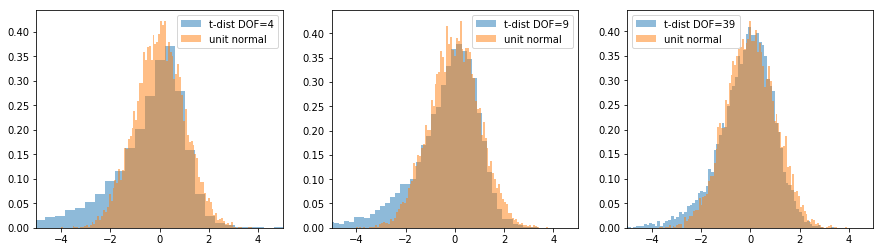

In [6]:
plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
plot_t_dist(population=exponential, sample_size=5, ax=ax1)

ax2 = plt.subplot(1, 3, 2)
plot_t_dist(population=exponential, sample_size=10, ax=ax2)

ax3 = plt.subplot(1, 3, 3)
plot_t_dist(population=exponential, sample_size=40, ax=ax3)